In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib as mpl
from projet_6_bis_iteration_friendly import *

# --- Paramètres du domaine et numérique ---
nx, ny = 31, 31
Lx, Ly = 1.0, 1.0
dt = 1e-5  # à ajuster si ça diverge à grand Re/Ra

# --- Grilles de paramètres ---
U0_list = [1e-3]              # -> plusieurs Re
Ra_list = [1e4]                # -> plusieurs Ra

Nu_map = np.zeros((len(U0_list), len(Ra_list)))
Re_list = np.zeros(len(U0_list))
T_list = []
psi_list = []

for i, U0 in enumerate(U0_list):
    for j, Ra in enumerate(Ra_list):
        Nu, Re, T, psi = global_resolution(nx, ny, Lx, Ly, dt, U0, Ra)
        Nu_map[i, j] = Nu
        Re_list[i] = Re
        T_list.append(T)
        psi_list.append(psi)
        print(f"U0={U0:.3g} | Re={Re:.3e} | Ra={Ra:.1e} -> Nu={Nu:.4f}")


Le nombre de Courant est égale à : 3e-07
Re = 100.0
Itération 0: Résidu w = inf, Résidu T = inf
Itération 10: Résidu w = 1.00e-01, Résidu T = 9.99e-02
Itération 20: Résidu w = 5.01e-02, Résidu T = 4.99e-02


c:\Users\33672\Documents\Cours\Transfert num vf\Thermal-transfert\projet_6_bis_iteration_friendly.py:63: RuntimeWarning: divide by zero encountered in scalar divide
  res_w.append(np.linalg.norm(w_new - w)/np.linalg.norm(w))
c:\Users\33672\Documents\Cours\Transfert num vf\Thermal-transfert\projet_6_bis_iteration_friendly.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  res_T.append(np.linalg.norm(T_new - T)/np.linalg.norm(T))


Itération 30: Résidu w = 3.36e-02, Résidu T = 3.32e-02
Itération 40: Résidu w = 2.53e-02, Résidu T = 2.49e-02
Itération 50: Résidu w = 2.04e-02, Résidu T = 1.99e-02
Itération 60: Résidu w = 1.72e-02, Résidu T = 1.65e-02
Itération 70: Résidu w = 1.49e-02, Résidu T = 1.42e-02
Itération 80: Résidu w = 1.31e-02, Résidu T = 1.24e-02
Itération 90: Résidu w = 1.18e-02, Résidu T = 1.10e-02
Itération 100: Résidu w = 1.08e-02, Résidu T = 9.87e-03
Itération 110: Résidu w = 9.93e-03, Résidu T = 8.96e-03
Itération 120: Résidu w = 9.23e-03, Résidu T = 8.21e-03
Itération 130: Résidu w = 8.64e-03, Résidu T = 7.57e-03
Itération 140: Résidu w = 8.14e-03, Résidu T = 7.02e-03
Itération 150: Résidu w = 7.70e-03, Résidu T = 6.54e-03
Itération 160: Résidu w = 7.33e-03, Résidu T = 6.13e-03
Itération 170: Résidu w = 7.00e-03, Résidu T = 5.76e-03
Itération 180: Résidu w = 6.70e-03, Résidu T = 5.43e-03
Itération 190: Résidu w = 6.44e-03, Résidu T = 5.14e-03
Itération 200: Résidu w = 6.20e-03, Résidu T = 4.88e-03

C:\Users\33672\AppData\Local\Temp\ipykernel_7708\1105203990.py:3: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = plt.imshow(
C:\Users\33672\AppData\Local\Temp\ipykernel_7708\1105203990.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = plt.imshow(


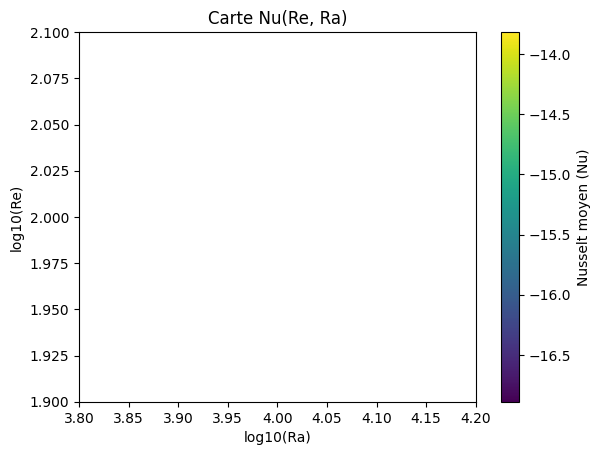

In [2]:
plt.figure()
# imshow a besoin d'un tableau 2D; on met Ra en x, Re en y
im = plt.imshow(
    Nu_map,
    aspect="auto",
    origin="lower",
    extent=[np.log10(Ra_list[0]), np.log10(Ra_list[-1]), np.log10(Re_list[0]), np.log10(Re_list[-1])]
)
plt.colorbar(im, label="Nusselt moyen (Nu)")
plt.xlabel("log10(Ra)")
plt.ylabel("log10(Re)")
plt.title("Carte Nu(Re, Ra)")
plt.show()


C:\Users\33672\AppData\Local\Temp\ipykernel_7708\542361812.py:6: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


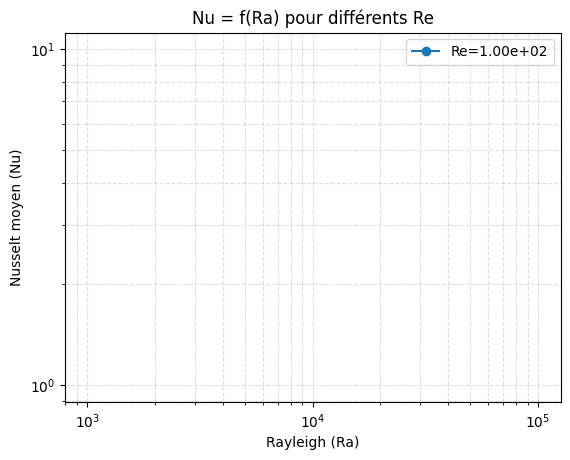

In [3]:
plt.figure()
for i, Re in enumerate(Re_list):
    plt.plot(Ra_list, Nu_map[i, :], marker="o", label=f"Re={Re:.2e}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Nusselt moyen (Nu)")
plt.title("Nu = f(Ra) pour différents Re")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


C:\Users\33672\AppData\Local\Temp\ipykernel_7708\1639993099.py:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


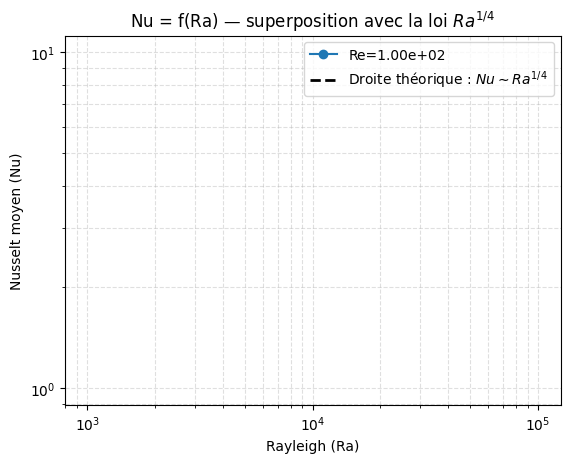

In [4]:
plt.figure()

# --- Courbes numériques ---
for i, Re in enumerate(Re_list):
    plt.plot(Ra_list, Nu_map[i, :], marker="o", label=f"Re={Re:.2e}")

# --- Choix du Re de référence (ex: Re = 100) ---
i_ref = np.argmin(np.abs(Re_list - 100.0))

# --- Droite théorique : pente 1/4 ---
Ra_th = np.array(Ra_list, dtype=float)

Ra0 = Ra_th[0]
Nu0 = Nu_map[i_ref, 0]

C = Nu0 / (Ra0**0.25)
Nu_th = C * Ra_th**0.25

plt.plot(
    Ra_th,
    Nu_th,
    "k--",
    linewidth=2,
    label=r"Droite théorique : $Nu \sim Ra^{1/4}$"
)

# --- Mise en forme ---
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Nusselt moyen (Nu)")
plt.title("Nu = f(Ra) — superposition avec la loi $Ra^{1/4}$")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


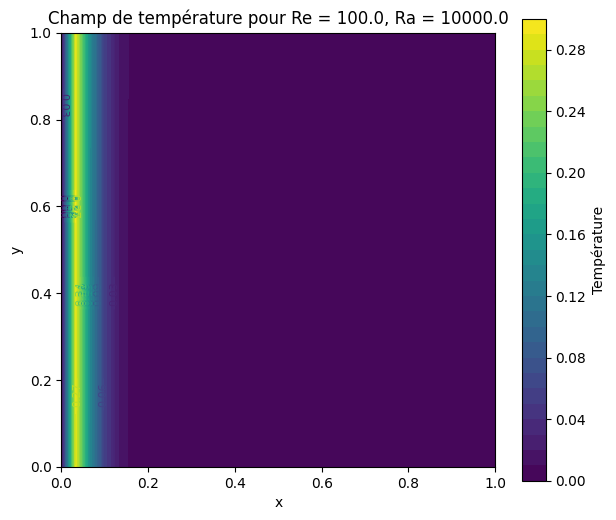

In [5]:
# 1. Préparation de la grille
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Sélection d'une itération (ex: la dernière enregistrée)
for i in range(len(U0_list)):
    for j in range(len(Ra_list)):
        nRa = len(Ra_list)
        T_plot = T_list[i*nRa + j]
        Re_plot = Re_list[i]
        Ra_plot = Ra_list[j]

        plt.figure(figsize=(7, 6))
        levels = 30

        cf = plt.contourf(X, Y, T_plot, levels=levels)   # champ coloré
        cs = plt.contour(X, Y, T_plot, levels=10, linewidths=0.8)  # isothermes
        plt.clabel(cs, inline=True, fontsize=8)

        plt.colorbar(cf, label="Température")
        plt.title("Champ de température pour Re = " + str(Re_plot) + ", Ra = " + str(Ra_plot))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, Lx)
        plt.ylim(0, Ly)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()


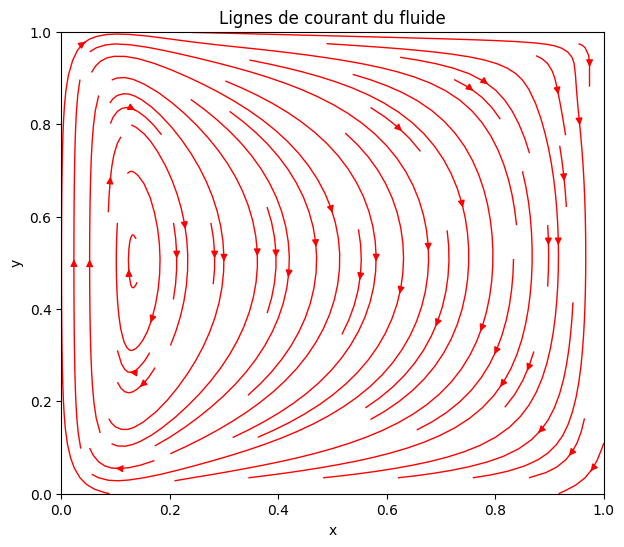

In [7]:
# 1. Préparation de la grille
dx, dy = Lx/(nx-1), Ly/(ny-1)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Sélection d'une itération (ex: la dernière enregistrée)
u_plot, v_plot = get_velocity(psi, dx, dy, U0)

plt.figure(figsize=(7, 6))
# streamplot calcule automatiquement les lignes tangentes au vecteur (u, v)
plt.streamplot(X, Y, u_plot, v_plot, color='red', linewidth=1)
plt.title("Lignes de courant du fluide")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.show()